In [8]:
import pandas as pd
import plotnine
from plotnine import *

### Get a list of the h5 files we want

In [5]:
import glob
import os
SEARCH_STR = '_20m.csv'
csv_list = glob.glob('/adapt/nobackup/people/pmontesa/userfs02/data/icesat2/atl08.005/howland/**/*'+SEARCH_STR, recursive=True)
f_list = [os.path.basename(f).replace(SEARCH_STR,"")+'.h5' for f in csv_list]
f_list

['ATL08_20190726183525_04380406_005_01.h5',
 'ATL08_20190920034007_12840402_005_01.h5',
 'ATL08_20190617080836_12230302_005_01.h5',
 'ATL08_20190824171134_08800406_005_01.h5',
 'ATL08_20190623200746_13220306_005_01.h5',
 'ATL08_20190922154739_13220406_005_01.h5',
 'ATL08_20190720063610_03390402_005_01.h5',
 'ATL08_20190926153920_13830406_005_01.h5',
 'ATL08_20190916034827_12230402_005_01.h5',
 'ATL08_20200919222647_13220806_005_01.h5',
 'ATL08_20200724011443_04380806_005_01.h5',
 'ATL08_20200614144748_12230702_005_01.h5',
 'ATL08_20200923221828_13830806_005_01.h5',
 'ATL08_20200819114314_08420802_005_01.h5',
 'ATL08_20200621024659_13220706_005_01.h5',
 'ATL08_20200821235044_08800806_005_01.h5',
 'ATL08_20210616211851_12841102_005_01.h5',
 'ATL08_20210715195455_03391202_005_01.h5',
 'ATL08_20210619092621_13221106_005_01.h5',
 'ATL08_20210813183101_07811202_005_01.h5',
 'ATL08_20210817182242_08421202_005_01.h5',
 'ATL08_20210612212711_12231102_005_01.h5']

In [20]:
'.'.join(['a','b']) 

'a.b'

In [35]:
h5_list = [os.path.join('/att/pubrepo/IceSAT-2/ATLAS/ATL08.005', 
              '.'.join([f.split('_')[1][0:4], f.split('_')[1][4:6], f.split('_')[1][6:8]]),
              f
             )  for f in f_list]

import csv

with open('/adapt/nobackup/people/pmontesa/userfs02/data/icesat2/atl08.005/list_atl08.005_howland','w') as myfile:
    wr = csv.writer(myfile, delimiter ='\n')
    wr.writerow(h5_list)

In [10]:
df = pd.read_csv('/adapt/nobackup/people/pmontesa/userfs02/data/icesat2/atl08.005/ATL08_20200614144748_12230702_005_01_20m.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_unique      4300 non-null   object 
 1   lon_20m        4300 non-null   float64
 2   lat_20m        4300 non-null   float64
 3   h_can_20m      4300 non-null   float64
 4   h_te_best_20m  4300 non-null   float64
 5   lon            4300 non-null   float64
 6   lat            4300 non-null   float64
 7   h_can          4300 non-null   float64
 8   h_max_can      4300 non-null   float64
 9   h_can_quad     4300 non-null   float64
 10  h_can_unc      4300 non-null   float64
 11  h_te_best      4300 non-null   float64
 12  h_te_unc       4300 non-null   float64
 13  rh10           4300 non-null   float64
 14  rh15           4300 non-null   float64
 15  rh20           4300 non-null   float64
 16  rh25           4300 non-null   float64
 17  rh30           4300 non-null   float64
 18  rh35    

In [46]:
def test(*args, **kwargs):
    print(args)
    print(kwargs)

test(a=3, b=4)
test(seg_cover=thresh_seg_cov, sig_topo=thresh_sig_topo, h_dif_ref=thresh_h_dif)


()
{'a': 3, 'b': 4}
()
{'seg_cover': 32767, 'sig_topo': 2.5, 'h_dif_ref': 25}


In [60]:
thresh_h_can_unc = 5
thresh_seg_cov = 32767
thresh_sol_el = 5
thresh_sig_topo = 2.5
thresh_h_dif = 25

def test_(*args, **kwargs):
    print(kwargs)
    
    
test_(dict=dict_misc_thresh)

{'dict': {'h_can_unc': 5, 'seg_cover': 32767, 'sol_el': 5, 'sig_topo': 2.5, 'h_dif_ref': 25}}


In [59]:

dict_misc_thresh = {#'h_te_unc': 5, 
                        'h_can_unc': thresh_h_can_unc, 
                        'seg_cover': thresh_seg_cov, 
                        'sol_el':   thresh_sol_el,
                        'sig_topo': thresh_sig_topo,
                        'h_dif_ref': thresh_h_dif
                        }
# Apply filter
df_filt = df.loc[(df[list(dict_misc_thresh)] < pd.Series(dict_misc_thresh)).all(axis=1)] 
df_filt.shape

(0, 70)

In [36]:
print(*dict_misc_thresh)

seg_cover sig_topo h_dif_ref


In [26]:
print(f"After misc thresholding with {[f'{k} < {v}' for k, v in dict_misc_thresh.items()]}")

After misc thresholding with ['seg_cover < 32767', 'sig_topo < 2.5']


In [ ]:
print(f"\tAfter h_can_unc <{thresh_h_can_unc}, seg_cover<{thresh_seg_cov}, sol_el<{thresh_sol_el}, sig_topo<{thresh_sig_topo}, h_dif_ref<{thresh_h_dif}: \t\t{atl08_df_filt.shape[0]} observations in the dataframe.")

In [7]:
df_filt

,id_unique,lon_20m,lat_20m,h_can_20m,h_te_best_20m,lon,lat,h_can,h_max_can,h_can_quad,...,sig_along,sig_h,sig_topo,n_te_ph,snr,sol_az,ph_rem_flg,dem_rem_flg,seg_wmask,lyr_flg
140,68W0035620-45N1988600-2020614-1,-6.800352e+01,4.519850e+01,6.175285e+00,6.846005e+01,-68.003563,45.198860,7.142281,7.142281,3.973443,...,5.0,0.17,0.080968,58,0.273347,128.832321,0,0,0,0
141,68W0035620-45N1988600-2020614-2,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,-68.003563,45.198860,7.142281,7.142281,3.973443,...,5.0,0.17,0.080968,58,0.273347,128.832321,0,0,0,0
142,68W0035620-45N1988600-2020614-3,-6.800356e+01,4.519886e+01,3.402823e+38,6.741108e+01,-68.003563,45.198860,7.142281,7.142281,3.973443,...,5.0,0.17,0.080968,58,0.273347,128.832321,0,0,0,0
143,68W0035620-45N1988600-2020614-4,-6.800359e+01,4.519904e+01,3.402823e+38,6.720608e+01,-68.003563,45.198860,7.142281,7.142281,3.973443,...,5.0,0.17,0.080968,58,0.273347,128.832321,0,0,0,0
144,68W0035620-45N1988600-2020614-5,-6.800361e+01,4.519922e+01,3.402823e+38,6.728880e+01,-68.003563,45.198860,7.142281,7.142281,3.973443,...,5.0,0.17,0.080968,58,0.273347,128.832321,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,68W0168600-45N8922920-2020614-1,-6.801682e+01,4.589193e+01,1.217634e+01,1.066247e+02,-68.016861,45.892292,11.764664,12.176338,5.657601,...,5.0,0.17,0.162960,36,0.015623,129.804031,0,0,0,0
4276,68W0168600-45N8922920-2020614-2,-6.801684e+01,4.589211e+01,1.093980e+01,1.071388e+02,-68.016861,45.892292,11.764664,12.176338,5.657601,...,5.0,0.17,0.162960,36,0.015623,129.804031,0,0,0,0
4277,68W0168600-45N8922920-2020614-3,-6.801686e+01,4.589229e+01,9.745544e+00,1.071655e+02,-68.016861,45.892292,11.764664,12.176338,5.657601,...,5.0,0.17,0.162960,36,0.015623,129.804031,0,0,0,0
4278,68W0168600-45N8922920-2020614-4,-6.801689e+01,4.589247e+01,1.206638e+01,1.082267e+02,-68.016861,45.892292,11.764664,12.176338,5.657601,...,5.0,0.17,0.162960,36,0.015623,129.804031,0,0,0,0


/gpfsm/ccds01/home/appmgr/app/jupyterhub/ilab/kernel/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.


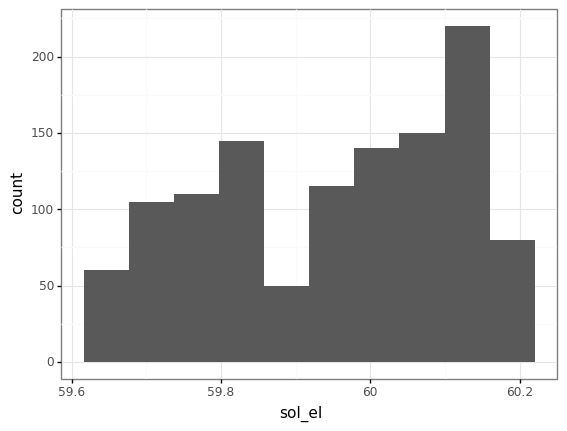

<ggplot: (1398168667333)>

In [9]:
from plotnine import ggplot, aes, geom_line, geom_point, geom_smooth, geom_bin2d, geom_abline, xlim, ylim, labs, theme_minimal, theme_bw

(
    ggplot()  # What data to use
    + aes(x=df_filt.sol_el)  # What variable to use
    + geom_histogram()
    + theme_bw()
    # + xlim(0,500) + ylim(0,500)

)